Import Packages 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

File Managment 

In [8]:
# Enter the filename without the extension
# The reorganized data will be saved as .csv files with the filename in the name
# For the reorganized data it will be {filename}_reorganized.csv
# For the correlation matrix it will be {filename}_correlation.csv
filename = 'rawdata'
filepath = filename + '.xlsx'  # This adds the Excel extension

# Read the data into a Pandas dataframe
data = pd.read_excel(filepath)



Data Check #1

In [9]:
# Display the first five rows of the data for a check
data.head(n=5)


,Facility Name,Municipality,BWA,BWA Periods,BWA Days,Unknown,Wind,Flooding,Break,Repairs,...,# Samples / month,Parameters Tested,Classified,Year Classified,SWS,Higher,Certified Operator,# Operators,Male,Female
0,Beddis,CRD,1,3,16,0,2,0,1,0,...,921,13,1.0,2007.0,1.0,0.0,1.0,3.0,3.0,0.0
1,Cedar Lane,CRD,1,1,1,1,0,0,0,0,...,588,8,1.0,2005.0,1.0,0.0,1.0,3.0,3.0,0.0
2,Cedars of Tuam,CRD,0,0,0,0,0,0,0,0,...,574,8,1.0,2011.0,1.0,0.0,1.0,2.0,2.0,0.0
3,Fulford,CRD,1,1,6,0,0,0,1,0,...,648,13,1.0,2007.0,1.0,0.0,1.0,3.0,3.0,0.0
4,H/F,CRD,1,12,53,0,2,0,8,1,...,1239,12,1.0,1993.0,0.0,1.0,1.0,2.0,2.0,0.0


Data Check #2

In [10]:
# Display the column info to check to see how many rows of data you have and if there are any nan values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 38 columns):
Facility Name         32 non-null object
Municipality          32 non-null object
BWA                   32 non-null int64
BWA Periods           32 non-null int64
BWA Days              32 non-null int64
Unknown               32 non-null int64
Wind                  32 non-null int64
Flooding              32 non-null int64
Break                 32 non-null int64
Repairs               32 non-null int64
Ecoli                 32 non-null int64
TC                    32 non-null int64
Turb                  32 non-null int64
Connections           32 non-null int64
Residential           32 non-null int64
Institutional         32 non-null int64
Commercial            32 non-null int64
Surface               32 non-null int64
Ground                32 non-null int64
Infastructure Age     31 non-null float64
Sedimentation         32 non-null int64
Filtration            32 non-null int64
UV           

Correlation Matrix

In [11]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Save the correlation matrix
correlation_matrix.to_csv(f'{filename}_correlation.csv')

Plot Parameters 

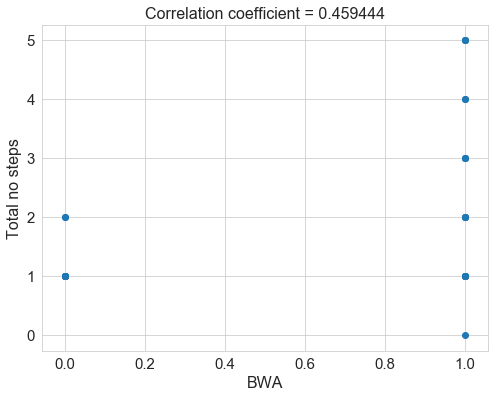

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Take two of the parameters and plot the scatter plot and display the Pearson's correlation coefficient

# Enter the parameters as they appear in the original data
param1 = 'BWA'
param2 = 'Total no steps'

# Get the data points for the two parameters
vals1 = data[param1].values
vals2 = data[param2].values

# Set nan vals to negative 10000, so they won't show up in our plot (We limit the plot to 0-1, 0-1)
# Also the correlation coefficient we'll pull directly from the correlation matrix
# This is a dirty reach-around
vals1[np.isnan(vals1)] = -10000
vals2[np.isnan(vals2)] = -10000

# Find the indices corresponding to the two parameters to find the correlation coefficient in the correlation matrix
param_names = correlation_matrix.columns
corr_matrix = correlation_matrix.values
param1_idx = np.squeeze(np.argwhere(param_names == param1))
param2_idx = np.squeeze(np.argwhere(param_names == param2))
correlation_value = corr_matrix[param1_idx, param2_idx]

sns.set_style('whitegrid')
fig = plt.figure(figsize=(8, 6))
plt.scatter(vals1, vals2)
plt.xlabel(param1, fontsize=16)
plt.ylabel(param2, fontsize=16)
plt.title(f'Correlation coefficient = {correlation_value:0.6f}', fontsize=16)
plt.tick_params(labelsize=15)
# plt.xlim((-0.1, 1.1))
# plt.ylim((-0.1, 1.1))
plt.show()